In [ ]:
#PREDICTING THREE YEAR RECIDIVISM RATES

In [1]:
#Women Gang = False
#Prison Offense = Property for all NaN
#Supervision Risk Score = 6 for all NaN
#Supervision Level NaN replaced with Standar, High, or Specialized based on Risk Score

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
        

import os

# Change the working directory
os.chdir("C:\\Users\gowgi\Desktop\pandas")
os.getcwd()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'C:\\Users\\gowgi\\Desktop\\pandas'

In [3]:
# import and view the training dataframe
train = pd.read_csv("NIJ_s_Recidivism_Challenge_Training_Dataset.csv")
train.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False


In [4]:
train = train.set_index('ID')

In [5]:
# import and view the test dataframe
test = pd.read_csv("NIJ_s_Recidivism_Challenge_Test_Dataset1.csv")
test.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other
0,6,M,WHITE,38-42,17,False,5.0,Standard,High School Diploma,0,...,2,0,False,False,False,False,False,False,False,True
1,8,M,BLACK,38-42,16,False,5.0,High,High School Diploma,3 or more,...,0,2 or more,True,False,False,False,False,False,True,False
2,12,M,BLACK,33-37,16,False,5.0,Specialized,High School Diploma,3 or more,...,0,2 or more,False,False,False,False,True,True,True,True
3,15,M,WHITE,33-37,5,False,7.0,Standard,Less than HS diploma,1,...,1,1,True,False,False,False,False,True,True,True
4,16,M,BLACK,33-37,3,False,4.0,Standard,Less than HS diploma,3 or more,...,0,2 or more,True,False,False,False,False,True,True,False


In [6]:
test = test.set_index('ID')

In [7]:
test.shape

(7807, 32)

In [8]:
# test df has fewer columns than train df
set(train.columns).intersection(set(test.columns)) # find like columns

{'Age_at_Release',
 'Condition_Cog_Ed',
 'Condition_MH_SA',
 'Condition_Other',
 'Dependents',
 'Education_Level',
 'Gang_Affiliated',
 'Gender',
 'Prior_Arrest_Episodes_DVCharges',
 'Prior_Arrest_Episodes_Drug',
 'Prior_Arrest_Episodes_Felony',
 'Prior_Arrest_Episodes_GunCharges',
 'Prior_Arrest_Episodes_Misd',
 'Prior_Arrest_Episodes_PPViolationCharges',
 'Prior_Arrest_Episodes_Property',
 'Prior_Arrest_Episodes_Violent',
 'Prior_Conviction_Episodes_DomesticViolenceCharges',
 'Prior_Conviction_Episodes_Drug',
 'Prior_Conviction_Episodes_Felony',
 'Prior_Conviction_Episodes_GunCharges',
 'Prior_Conviction_Episodes_Misd',
 'Prior_Conviction_Episodes_PPViolationCharges',
 'Prior_Conviction_Episodes_Prop',
 'Prior_Conviction_Episodes_Viol',
 'Prior_Revocations_Parole',
 'Prior_Revocations_Probation',
 'Prison_Offense',
 'Prison_Years',
 'Race',
 'Residence_PUMA',
 'Supervision_Level_First',
 'Supervision_Risk_Score_First'}

In [9]:
# drop extra coulmns from test df
# keeping Recidivsism_Arrest_Year1
train1 = train[['Age_at_Release','Condition_Cog_Ed','Condition_MH_SA',
                'Condition_Other','Dependents','Education_Level','Gang_Affiliated',
                'Gender','Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_Drug',
                'Prior_Arrest_Episodes_Felony','Prior_Arrest_Episodes_GunCharges',
                'Prior_Arrest_Episodes_Misd','Prior_Arrest_Episodes_PPViolationCharges',
                'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Violent',
                'Prior_Conviction_Episodes_DomesticViolenceCharges','Prior_Conviction_Episodes_Drug',
                'Prior_Conviction_Episodes_Felony','Prior_Conviction_Episodes_GunCharges',
                'Prior_Conviction_Episodes_Misd','Prior_Conviction_Episodes_PPViolationCharges',
                'Prior_Conviction_Episodes_Prop','Prior_Conviction_Episodes_Viol','Prior_Revocations_Parole',
                'Prior_Revocations_Probation','Prison_Offense','Prison_Years','Race','Residence_PUMA',
                'Supervision_Level_First','Supervision_Risk_Score_First','Recidivism_Arrest_Year1']]

train1.shape # same number of columns between the two datasets

(18028, 33)

In [10]:
# check for missing values in training set
train1.isnull().sum()

Age_at_Release                                          0
Condition_Cog_Ed                                        0
Condition_MH_SA                                         0
Condition_Other                                         0
Dependents                                              0
Education_Level                                         0
Gang_Affiliated                                      2217
Gender                                                  0
Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Violent                           0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
Prior_Convicti

In [11]:
# check for missing values in test set
test.isnull().sum() # both datasets have the same columns with NaN values

Gender                                                 0
Race                                                   0
Age_at_Release                                         0
Residence_PUMA                                         0
Gang_Affiliated                                      950
Supervision_Risk_Score_First                         145
Supervision_Level_First                              508
Education_Level                                        0
Dependents                                             0
Prison_Offense                                       956
Prison_Years                                           0
Prior_Arrest_Episodes_Felony                           0
Prior_Arrest_Episodes_Misd                             0
Prior_Arrest_Episodes_Violent                          0
Prior_Arrest_Episodes_Property                         0
Prior_Arrest_Episodes_Drug                             0
Prior_Arrest_Episodes_PPViolationCharges               0
Prior_Arrest_Episodes_DVCharges

In [12]:
# Analyze missing values
# Drop or impute values?

# look closer at gang affiliation
train1.groupby('Gender')['Gang_Affiliated'].value_counts(normalize=True) 

# Only 17.5% of the offenders have gang ties
# no record of women...

Gender  Gang_Affiliated
M       False              0.82411
        True               0.17589
Name: Gang_Affiliated, dtype: float64

In [13]:
train1.Gender.value_counts() # all men gang affiliation is accounted for
# only women have NaN values for gang affiliation

M    15811
F     2217
Name: Gender, dtype: int64

In [14]:
# leave women in the dataset, but give them no gang affiliation
train1['Gang_Affiliated'] = train1['Gang_Affiliated'].fillna('False')

C:\Users\gowgi\AppData\Local\Temp/ipykernel_15972/1654900001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Gang_Affiliated'] = train1['Gang_Affiliated'].fillna('False')


In [15]:
# gang affiliation for test set (fill na with 'False' like in the training set)
test['Gang_Affiliated'] = test['Gang_Affiliated'].fillna('False')

In [16]:
# look closer at prison offense
train1.Prison_Offense.value_counts(normalize=True) # most crimes are property crimes

Property           0.369071
Violent/Non-Sex    0.241739
Drug               0.230279
Other              0.121793
Violent/Sex        0.037117
Name: Prison_Offense, dtype: float64

In [17]:
train1.groupby('Gender')['Prison_Offense'].value_counts(normalize=True)
# 44% of women's crimes are property crimes
# 35.8% of men's crimes are property crimes

Gender  Prison_Offense 
F       Property           0.441013
        Drug               0.309367
        Violent/Non-Sex    0.166076
        Other              0.083544
M       Property           0.358724
        Violent/Non-Sex    0.252622
        Drug               0.218905
        Other              0.127294
        Violent/Sex        0.042456
Name: Prison_Offense, dtype: float64

In [18]:
# fill missing prison offenses with the majority crime for training set
train1['Prison_Offense']=train1['Prison_Offense'].fillna('Property')

C:\Users\gowgi\AppData\Local\Temp/ipykernel_15972/1560506762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Prison_Offense']=train1['Prison_Offense'].fillna('Property')


In [19]:
# fill missing prison offenses with the majority crime for testing set
test['Prison_Offense']=test['Prison_Offense'].fillna('Property')

In [20]:
train1.isnull().sum()

Age_at_Release                                          0
Condition_Cog_Ed                                        0
Condition_MH_SA                                         0
Condition_Other                                         0
Dependents                                              0
Education_Level                                         0
Gang_Affiliated                                         0
Gender                                                  0
Prior_Arrest_Episodes_DVCharges                         0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_GunCharges                        0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_PPViolationCharges                0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Violent                           0
Prior_Conviction_Episodes_DomesticViolenceCharges       0
Prior_Convicti

In [21]:
# look closer at Supervision_Risk_Score_First
train1.groupby('Gender')['Supervision_Risk_Score_First'].value_counts(normalize=True)

Gender  Supervision_Risk_Score_First
F       5.0                             0.145814
        7.0                             0.145814
        6.0                             0.139374
        8.0                             0.119595
        4.0                             0.111776
        9.0                             0.105336
        3.0                             0.089696
        10.0                            0.075897
        2.0                             0.046458
        1.0                             0.020239
M       6.0                             0.152925
        7.0                             0.142038
        5.0                             0.136305
        8.0                             0.112600
        4.0                             0.112213
        9.0                             0.097784
        10.0                            0.087284
        3.0                             0.081293
        2.0                             0.045414
        1.0                     

<AxesSubplot:xlabel='Supervision_Risk_Score_First', ylabel='Count'>

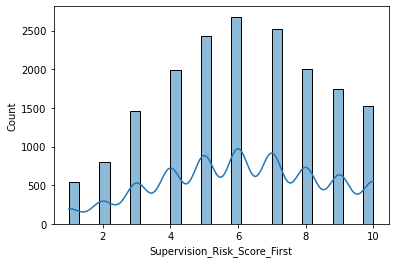

In [22]:
import seaborn as sns
sns.histplot(data = train1, x='Supervision_Risk_Score_First', kde = True) # semi normal distribution

In [23]:
# replace missing Supervision_Risk_Score_First with mean of 6
train1['Supervision_Risk_Score_First']=train1['Supervision_Risk_Score_First'].fillna(float(6))

C:\Users\gowgi\AppData\Local\Temp/ipykernel_15972/2661958926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Supervision_Risk_Score_First']=train1['Supervision_Risk_Score_First'].fillna(float(6))


In [24]:
# replace missing Supervision_Risk_Score_First with mean of 6 for test set
test['Supervision_Risk_Score_First']=test['Supervision_Risk_Score_First'].fillna(float(6))

In [25]:
# look closer at Supervision Level First
train1.groupby('Supervision_Level_First')['Supervision_Risk_Score_First'].value_counts(normalize=True)

# High = score of 6, 7, 8
# Specialized = score of 9, 10
# Standadr = score of 1, 2, 3, 4, 5

Supervision_Level_First  Supervision_Risk_Score_First
High                     6.0                             0.345095
                         7.0                             0.329798
                         8.0                             0.268407
                         5.0                             0.018356
                         9.0                             0.012441
                         4.0                             0.009382
                         1.0                             0.005711
                         10.0                            0.005507
                         3.0                             0.003467
                         2.0                             0.001836
Specialized              9.0                             0.288142
                         10.0                            0.260219
                         6.0                             0.094699
                         7.0                             0.076690
                      

In [26]:
# replace missing values of Supervision Level with High, Specialized, or Standard based on Risk Score
def func(row):
    if row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] <= float(5):
        return 'Standard'
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] >= float(9):
        return 'Specialized'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(6):
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(7):
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(8):
        return 'High'
    else:
        return row['Supervision_Level_First']

train1['Supervision_Level_First'] = train1.apply(func, axis=1)

C:\Users\gowgi\AppData\Local\Temp/ipykernel_15972/3643994130.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Supervision_Level_First'] = train1.apply(func, axis=1)


In [27]:
# do the same for test set
def func(row):
    if row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] <= float(5):
        return 'Standard'
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] >= float(9):
        return 'Specialized'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(6):
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(7):
        return 'High'
    elif row['Supervision_Level_First'] is np.nan and row['Supervision_Risk_Score_First'] == float(8):
        return 'High'
    else:
        return row['Supervision_Level_First']

test['Supervision_Level_First'] = test.apply(func, axis=1)

In [28]:
# verify all missing values have been taken care of for training set
train1.isnull().sum()

Age_at_Release                                       0
Condition_Cog_Ed                                     0
Condition_MH_SA                                      0
Condition_Other                                      0
Dependents                                           0
Education_Level                                      0
Gang_Affiliated                                      0
Gender                                               0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Violent                        0
Prior_Conviction_Episodes_DomesticViolenceCharges    0
Prior_Conviction_Episodes_Drug                       0
Prior_Conv

In [29]:
# verify all missing values have been taken care of for test set
test.isnull().sum()

Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arre

In [30]:
# create dummy variables for the training set
train1 = pd.get_dummies(train1, columns=['Age_at_Release','Prison_Offense','Condition_Cog_Ed','Condition_MH_SA',
                'Condition_Other','Dependents','Education_Level','Gang_Affiliated',
                'Gender','Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_Drug',
                'Prior_Arrest_Episodes_Felony','Prior_Arrest_Episodes_GunCharges',
                'Prior_Arrest_Episodes_Misd','Prior_Arrest_Episodes_PPViolationCharges',
                'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Violent',
                'Prior_Conviction_Episodes_DomesticViolenceCharges','Prior_Conviction_Episodes_Drug',
                'Prior_Conviction_Episodes_Felony','Prior_Conviction_Episodes_GunCharges',
                'Prior_Conviction_Episodes_Misd','Prior_Conviction_Episodes_PPViolationCharges',
                'Prior_Conviction_Episodes_Prop','Prior_Conviction_Episodes_Viol','Prior_Revocations_Parole',
                'Prior_Revocations_Probation','Prison_Years','Race','Residence_PUMA',
                'Supervision_Level_First','Supervision_Risk_Score_First','Recidivism_Arrest_Year1'], drop_first=True)

In [31]:
# create the same dummy variables for the test set
test = pd.get_dummies(test, columns=['Age_at_Release','Prison_Offense','Condition_Cog_Ed','Condition_MH_SA',
                'Condition_Other','Dependents','Education_Level','Gang_Affiliated',
                'Gender','Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_Drug',
                'Prior_Arrest_Episodes_Felony','Prior_Arrest_Episodes_GunCharges',
                'Prior_Arrest_Episodes_Misd','Prior_Arrest_Episodes_PPViolationCharges',
                'Prior_Arrest_Episodes_Property','Prior_Arrest_Episodes_Violent',
                'Prior_Conviction_Episodes_DomesticViolenceCharges','Prior_Conviction_Episodes_Drug',
                'Prior_Conviction_Episodes_Felony','Prior_Conviction_Episodes_GunCharges',
                'Prior_Conviction_Episodes_Misd','Prior_Conviction_Episodes_PPViolationCharges',
                'Prior_Conviction_Episodes_Prop','Prior_Conviction_Episodes_Viol','Prior_Revocations_Parole',
                'Prior_Revocations_Probation','Prison_Years','Race','Residence_PUMA',
                'Supervision_Level_First','Supervision_Risk_Score_First'], drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split # import 'train_test_split'
from xgboost import XGBClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer # import metrics from sklearn
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [33]:
df_train = train1.drop(['Recidivism_Arrest_Year1_True'], axis=1)
target = train1.Recidivism_Arrest_Year1_True
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state=42)

In [34]:
ada_obj = AdaBoostClassifier(learning_rate = 0.1,
                             n_estimators = 2000,
                             random_state=42)
ada_opt = ada_obj.fit(X_train, y_train)

In [35]:
accuracy_score(ada_obj.predict(X_test), y_test)

0.7011315731084979

In [36]:
GBC_obj = GradientBoostingClassifier(learning_rate = 0.05,
                                     max_depth = 3,
                                     min_samples_leaf = 5,
                                     min_samples_split = 4,
                                     n_estimators = 500,
                                     random_state=42)
GBC_opt = GBC_obj.fit(X_train, y_train)

In [37]:
accuracy_score(GBC_opt.predict(X_test), y_test)

0.6991346793876193

In [38]:
space = {'max_depth':hp.quniform("max_depth", 3, 18, 1),
        'gamma':hp.uniform('gamma',1,9),
        'reg_alpha':hp.quniform('reg_alpha',40,180,1),
        'reg_lambda':hp.uniform('reg_lambda',0,1),
        'colsample_bytree':hp.uniform('colsample_bytree',0.5,1),
        'min_child_weight':hp.quniform('min_child_weight',0,10,1),
        'n_estimators':180,
        'seed':0}

In [39]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [40]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  1%|▍                                              | 1/100 [00:00<00:45,  2.19trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  2%|▉                                              | 2/100 [00:00<00:43,  2.25trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  3%|█▍                                             | 3/100 [00:01<00:40,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  4%|█▉                                             | 4/100 [00:01<00:36,  2.62trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  5%|██▎                                            | 5/100 [00:01<00:33,  2.85trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  6%|██▊                                            | 6/100 [00:02<00:33,  2.78trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  7%|███▎                                           | 7/100 [00:02<00:34,  2.68trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  8%|███▊                                           | 8/100 [00:03<00:47,  1.93trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
  9%|████▏                                          | 9/100 [00:03<00:43,  2.08trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 10%|████▌                                         | 10/100 [00:04<00:53,  1.70trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 11%|█████                                         | 11/100 [00:05<00:59,  1.50trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 12%|█████▌                                        | 12/100 [00:05<00:51,  1.72trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 13%|█████▉                                        | 13/100 [00:06<00:45,  1.90trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 14%|██████▍                                       | 14/100 [00:06<00:41,  2.06trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 15%|██████▉                                       | 15/100 [00:07<00:38,  2.18trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 16%|███████▎                                      | 16/100 [00:07<00:39,  2.15trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 17%|███████▊                                      | 17/100 [00:08<00:48,  1.72trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 18%|████████▎                                     | 18/100 [00:08<00:42,  1.91trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 19%|████████▋                                     | 19/100 [00:09<00:50,  1.62trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 20%|█████████▏                                    | 20/100 [00:10<00:41,  1.92trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 21%|█████████▋                                    | 21/100 [00:10<00:38,  2.08trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 22%|██████████                                    | 22/100 [00:10<00:35,  2.19trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 23%|██████████▌                                   | 23/100 [00:11<00:34,  2.25trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 24%|███████████                                   | 24/100 [00:11<00:32,  2.33trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 25%|███████████▌                                  | 25/100 [00:12<00:31,  2.36trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 26%|███████████▉                                  | 26/100 [00:12<00:30,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 27%|████████████▍                                 | 27/100 [00:12<00:30,  2.42trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 28%|████████████▉                                 | 28/100 [00:13<00:29,  2.46trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 29%|█████████████▎                                | 29/100 [00:14<00:40,  1.76trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 30%|█████████████▊                                | 30/100 [00:14<00:36,  1.93trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 31%|██████████████▎                               | 31/100 [00:14<00:33,  2.03trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 32%|██████████████▋                               | 32/100 [00:15<00:40,  1.68trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 33%|███████████████▏                              | 33/100 [00:16<00:36,  1.86trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 34%|███████████████▋                              | 34/100 [00:16<00:31,  2.08trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 35%|████████████████                              | 35/100 [00:17<00:30,  2.13trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 36%|████████████████▌                             | 36/100 [00:17<00:27,  2.29trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 37%|█████████████████                             | 37/100 [00:17<00:27,  2.30trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 38%|█████████████████▍                            | 38/100 [00:18<00:26,  2.32trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 39%|█████████████████▉                            | 39/100 [00:18<00:25,  2.35trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 40%|██████████████████▍                           | 40/100 [00:19<00:25,  2.38trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 41%|██████████████████▊                           | 41/100 [00:19<00:24,  2.36trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 42%|███████████████████▎                          | 42/100 [00:20<00:32,  1.79trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 43%|███████████████████▊                          | 43/100 [00:20<00:29,  1.93trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 44%|████████████████████▏                         | 44/100 [00:21<00:27,  2.05trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 45%|████████████████████▋                         | 45/100 [00:21<00:25,  2.16trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 46%|█████████████████████▏                        | 46/100 [00:22<00:24,  2.23trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 47%|█████████████████████▌                        | 47/100 [00:22<00:21,  2.42trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 48%|██████████████████████                        | 48/100 [00:22<00:21,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 49%|██████████████████████▌                       | 49/100 [00:23<00:21,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 50%|███████████████████████                       | 50/100 [00:23<00:20,  2.38trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 51%|███████████████████████▍                      | 51/100 [00:24<00:20,  2.35trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 52%|███████████████████████▉                      | 52/100 [00:24<00:20,  2.31trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 53%|████████████████████████▍                     | 53/100 [00:25<00:29,  1.62trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 54%|████████████████████████▊                     | 54/100 [00:26<00:31,  1.45trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 55%|█████████████████████████▎                    | 55/100 [00:26<00:27,  1.65trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 56%|█████████████████████████▊                    | 56/100 [00:27<00:30,  1.44trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 57%|██████████████████████████▏                   | 57/100 [00:28<00:26,  1.64trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 58%|██████████████████████████▋                   | 58/100 [00:28<00:23,  1.82trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 59%|███████████████████████████▏                  | 59/100 [00:28<00:20,  1.97trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 60%|███████████████████████████▌                  | 60/100 [00:29<00:19,  2.10trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 61%|████████████████████████████                  | 61/100 [00:29<00:17,  2.17trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 62%|████████████████████████████▌                 | 62/100 [00:30<00:17,  2.20trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 63%|████████████████████████████▉                 | 63/100 [00:30<00:15,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 64%|█████████████████████████████▍                | 64/100 [00:30<00:14,  2.46trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 65%|█████████████████████████████▉                | 65/100 [00:31<00:19,  1.82trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 66%|██████████████████████████████▎               | 66/100 [00:32<00:16,  2.05trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 67%|██████████████████████████████▊               | 67/100 [00:32<00:14,  2.26trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 68%|███████████████████████████████▎              | 68/100 [00:32<00:13,  2.42trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 69%|███████████████████████████████▋              | 69/100 [00:33<00:12,  2.41trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 70%|████████████████████████████████▏             | 70/100 [00:33<00:12,  2.41trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 71%|████████████████████████████████▋             | 71/100 [00:34<00:11,  2.43trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 72%|█████████████████████████████████             | 72/100 [00:34<00:11,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 73%|█████████████████████████████████▌            | 73/100 [00:34<00:11,  2.42trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 74%|██████████████████████████████████            | 74/100 [00:35<00:10,  2.44trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 75%|██████████████████████████████████▌           | 75/100 [00:35<00:10,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 76%|██████████████████████████████████▉           | 76/100 [00:36<00:13,  1.81trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 77%|███████████████████████████████████▍          | 77/100 [00:37<00:14,  1.54trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 78%|███████████████████████████████████▉          | 78/100 [00:38<00:16,  1.33trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6875970712225428                                                                                                     
 79%|████████████████████████████████████▎         | 79/100 [00:39<00:18,  1.15trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 80%|████████████████████████████████████▊         | 80/100 [00:40<00:15,  1.33trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 81%|█████████████████████████████████████▎        | 81/100 [00:40<00:12,  1.52trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 82%|█████████████████████████████████████▋        | 82/100 [00:40<00:10,  1.69trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 83%|██████████████████████████████████████▏       | 83/100 [00:41<00:09,  1.85trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 84%|██████████████████████████████████████▋       | 84/100 [00:42<00:10,  1.53trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 85%|███████████████████████████████████████       | 85/100 [00:42<00:08,  1.68trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 86%|███████████████████████████████████████▌      | 86/100 [00:43<00:07,  1.83trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 87%|████████████████████████████████████████      | 87/100 [00:44<00:08,  1.52trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 88%|████████████████████████████████████████▍     | 88/100 [00:44<00:07,  1.71trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 89%|████████████████████████████████████████▉     | 89/100 [00:44<00:05,  1.86trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 90%|█████████████████████████████████████████▍    | 90/100 [00:45<00:05,  1.96trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 91%|█████████████████████████████████████████▊    | 91/100 [00:46<00:04,  1.82trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 92%|██████████████████████████████████████████▎   | 92/100 [00:46<00:04,  1.85trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 93%|██████████████████████████████████████████▊   | 93/100 [00:47<00:03,  1.93trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 94%|███████████████████████████████████████████▏  | 94/100 [00:47<00:02,  2.11trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 95%|███████████████████████████████████████████▋  | 95/100 [00:47<00:02,  2.27trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 96%|████████████████████████████████████████████▏ | 96/100 [00:48<00:01,  2.40trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 97%|████████████████████████████████████████████▌ | 97/100 [00:48<00:01,  2.49trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 98%|█████████████████████████████████████████████ | 98/100 [00:49<00:00,  2.18trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
 99%|█████████████████████████████████████████████▌| 99/100 [00:49<00:00,  1.92trial/s, best loss: -0.6878189483026403]

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\gowgi\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.6878189483026403                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97trial/s, best loss: -0.6878189483026403]


In [41]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6636556094746427, 'gamma': 2.566943575452556, 'max_depth': 12.0, 'min_child_weight': 5.0, 'reg_alpha': 99.0, 'reg_lambda': 0.27470948428760733}


In [42]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=0.66, gamma=2.57,
                   learning_rate=0.05, max_delta_step=0, max_depth=12,
                   min_child_weight=5, missing=1, n_estimators=500,n_jobs=1,
                   nthread=None, objective='binary:logistic', random_state=0,
                   reg_alpha=99, reg_lambda=0.27, scale_pos_weight=1,
                   seed=None, silent=None, subsample=1, verbosity=1)




#training_start = time.perf_counter()
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 69.25


In [43]:
Recidivism_Year_One = xgb.predict_proba(test)[:,1]
Recidivism_Year_One

array([0.18290594, 0.29402286, 0.24360041, ..., 0.17241332, 0.17241332,
       0.1559246 ], dtype=float32)

In [44]:
prediction = pd.DataFrame(Recidivism_Year_One, columns=['Recidivism_Arrest_Year1']).to_csv('Recidivism_2.1.1A.csv')